In [1]:
!nvidia-smi

Sat Aug  3 22:48:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/201.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="4Ts5EtE28AsGGN34LhP1")
project = rf.workspace("trafficlamb-f7dbi").project("baret_detection")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to baret_detection-1 in yolov8:: 100%|██████████| 176/176 [00:00<00:00, 6260.10it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 358MB/s]
New https://pypi.org/project/ultralytics/8.2.72 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/baret_detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, strea

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch75.jpg
confusion_matrix.png				    R_curve.png       train_batch76.jpg
events.out.tfevents.1722725412.2b9d3b625b08.1657.0  results.csv       train_batch77.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


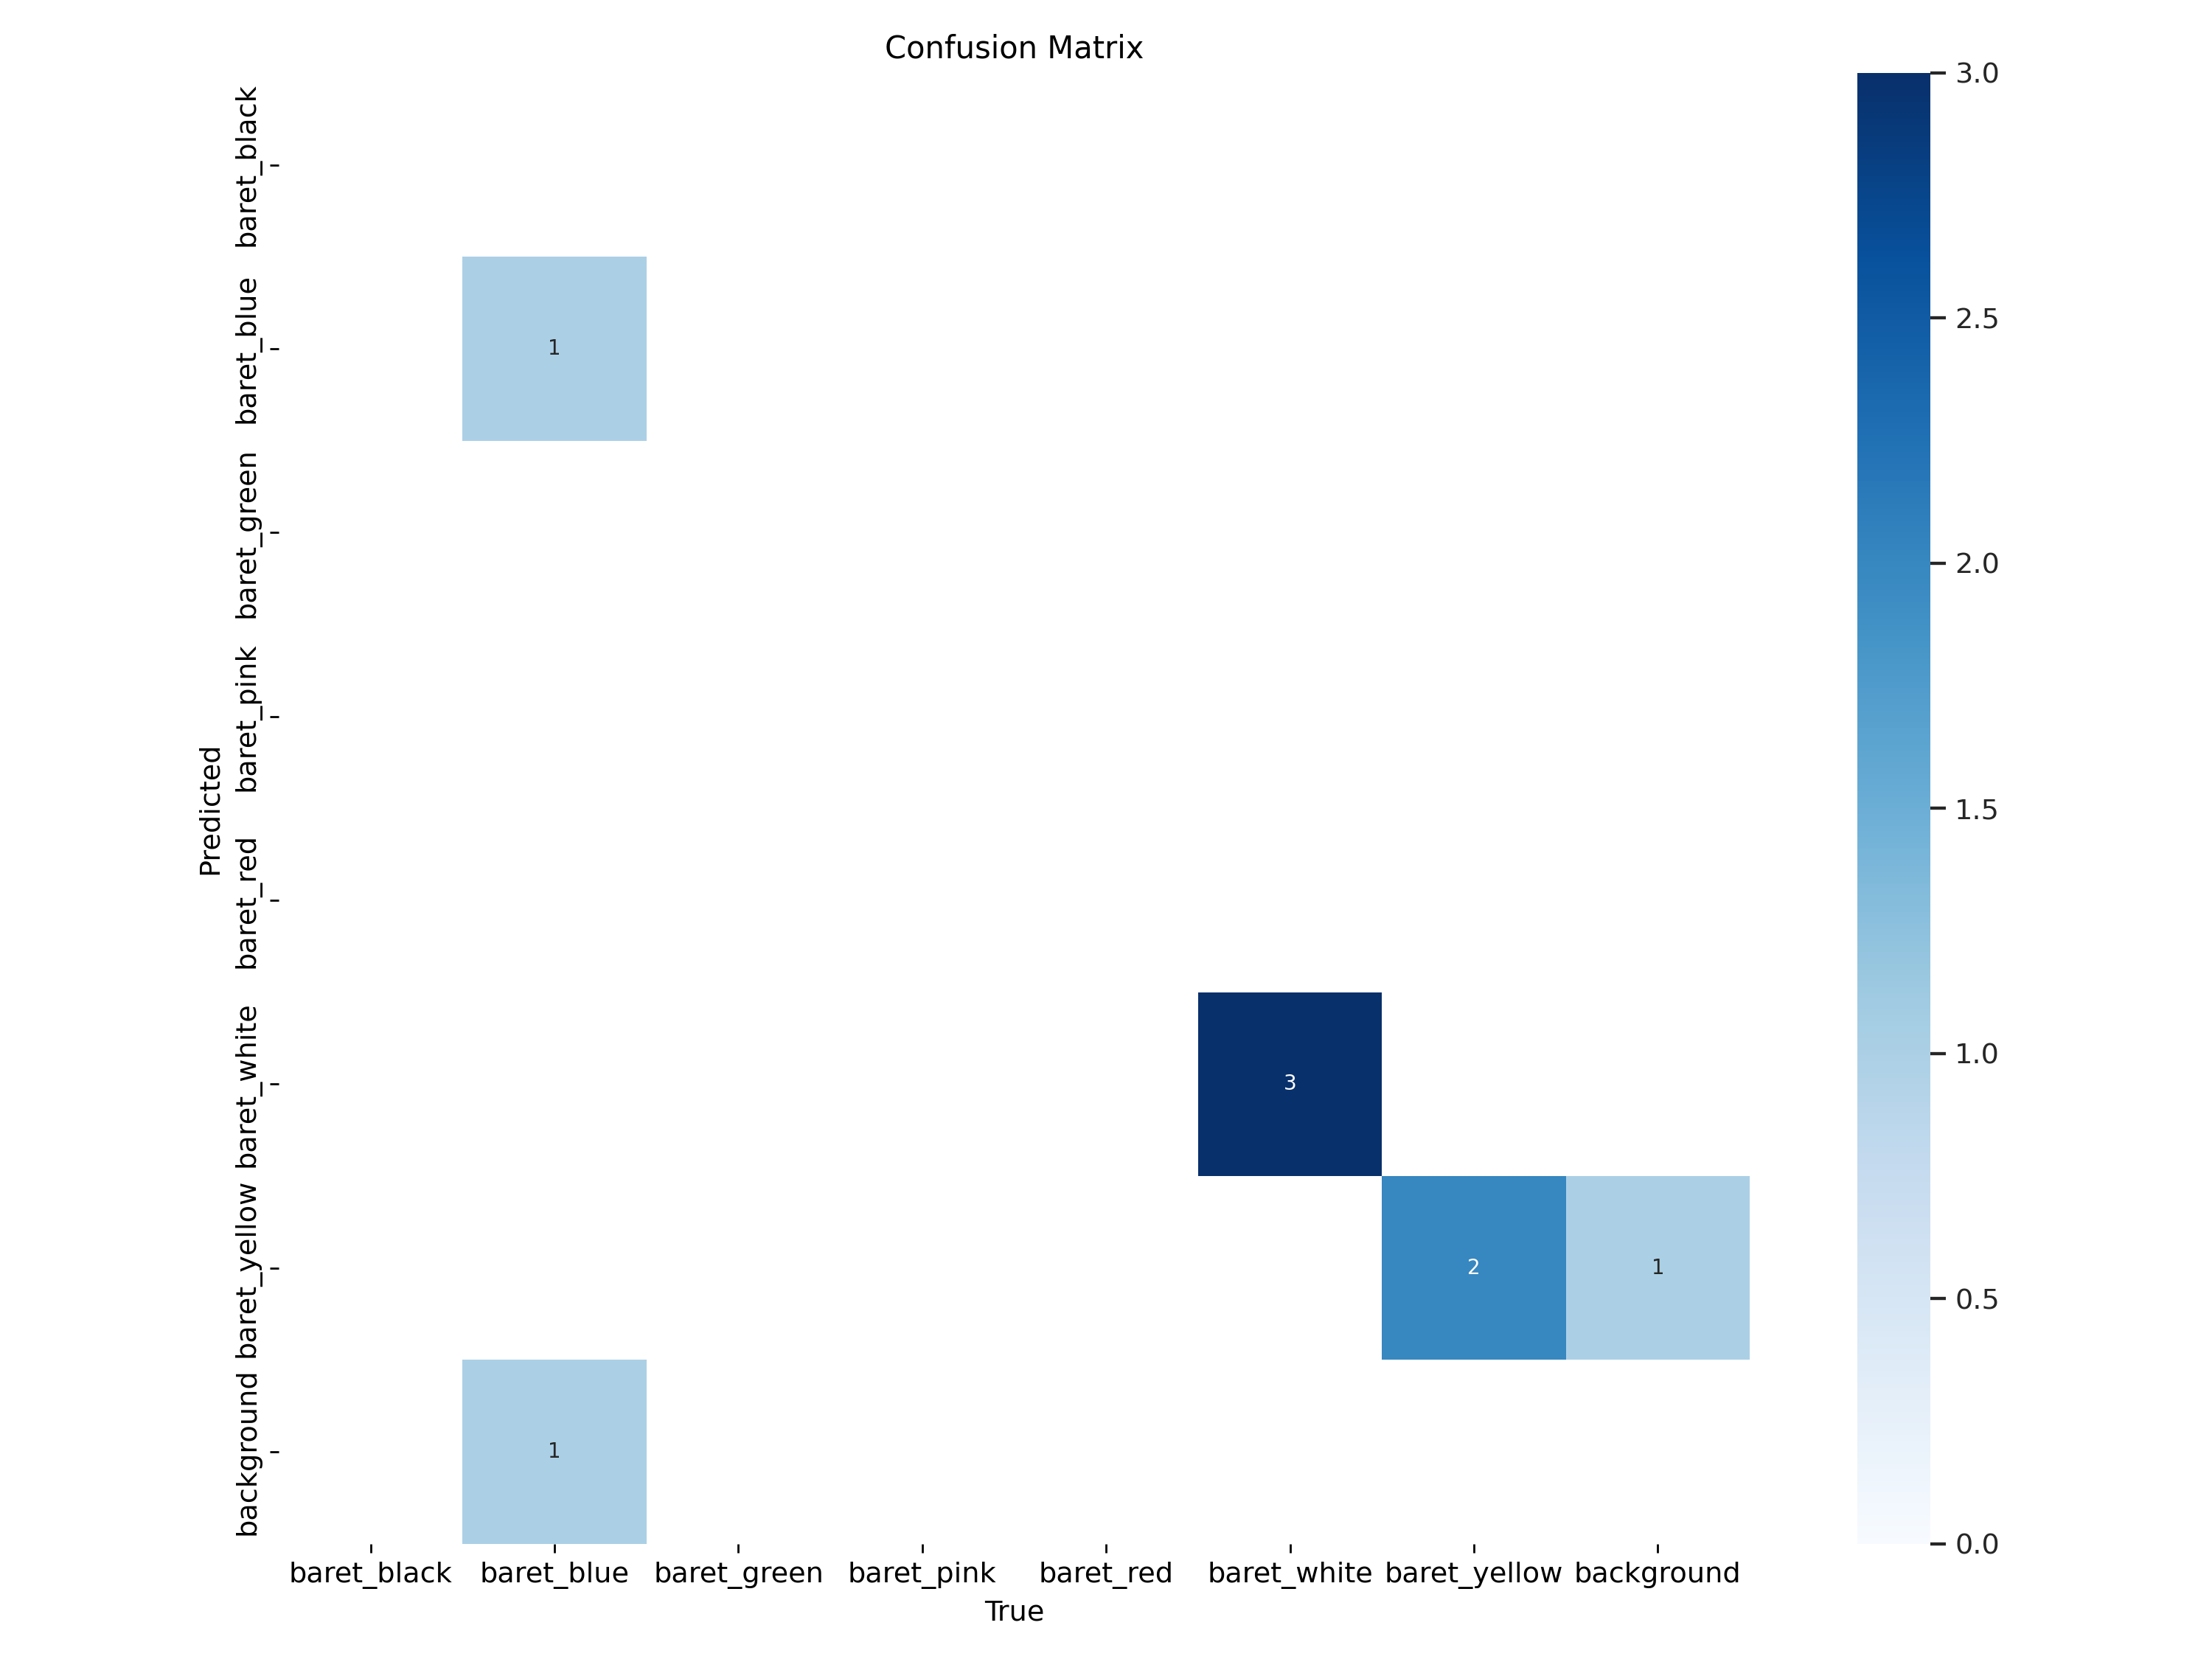

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


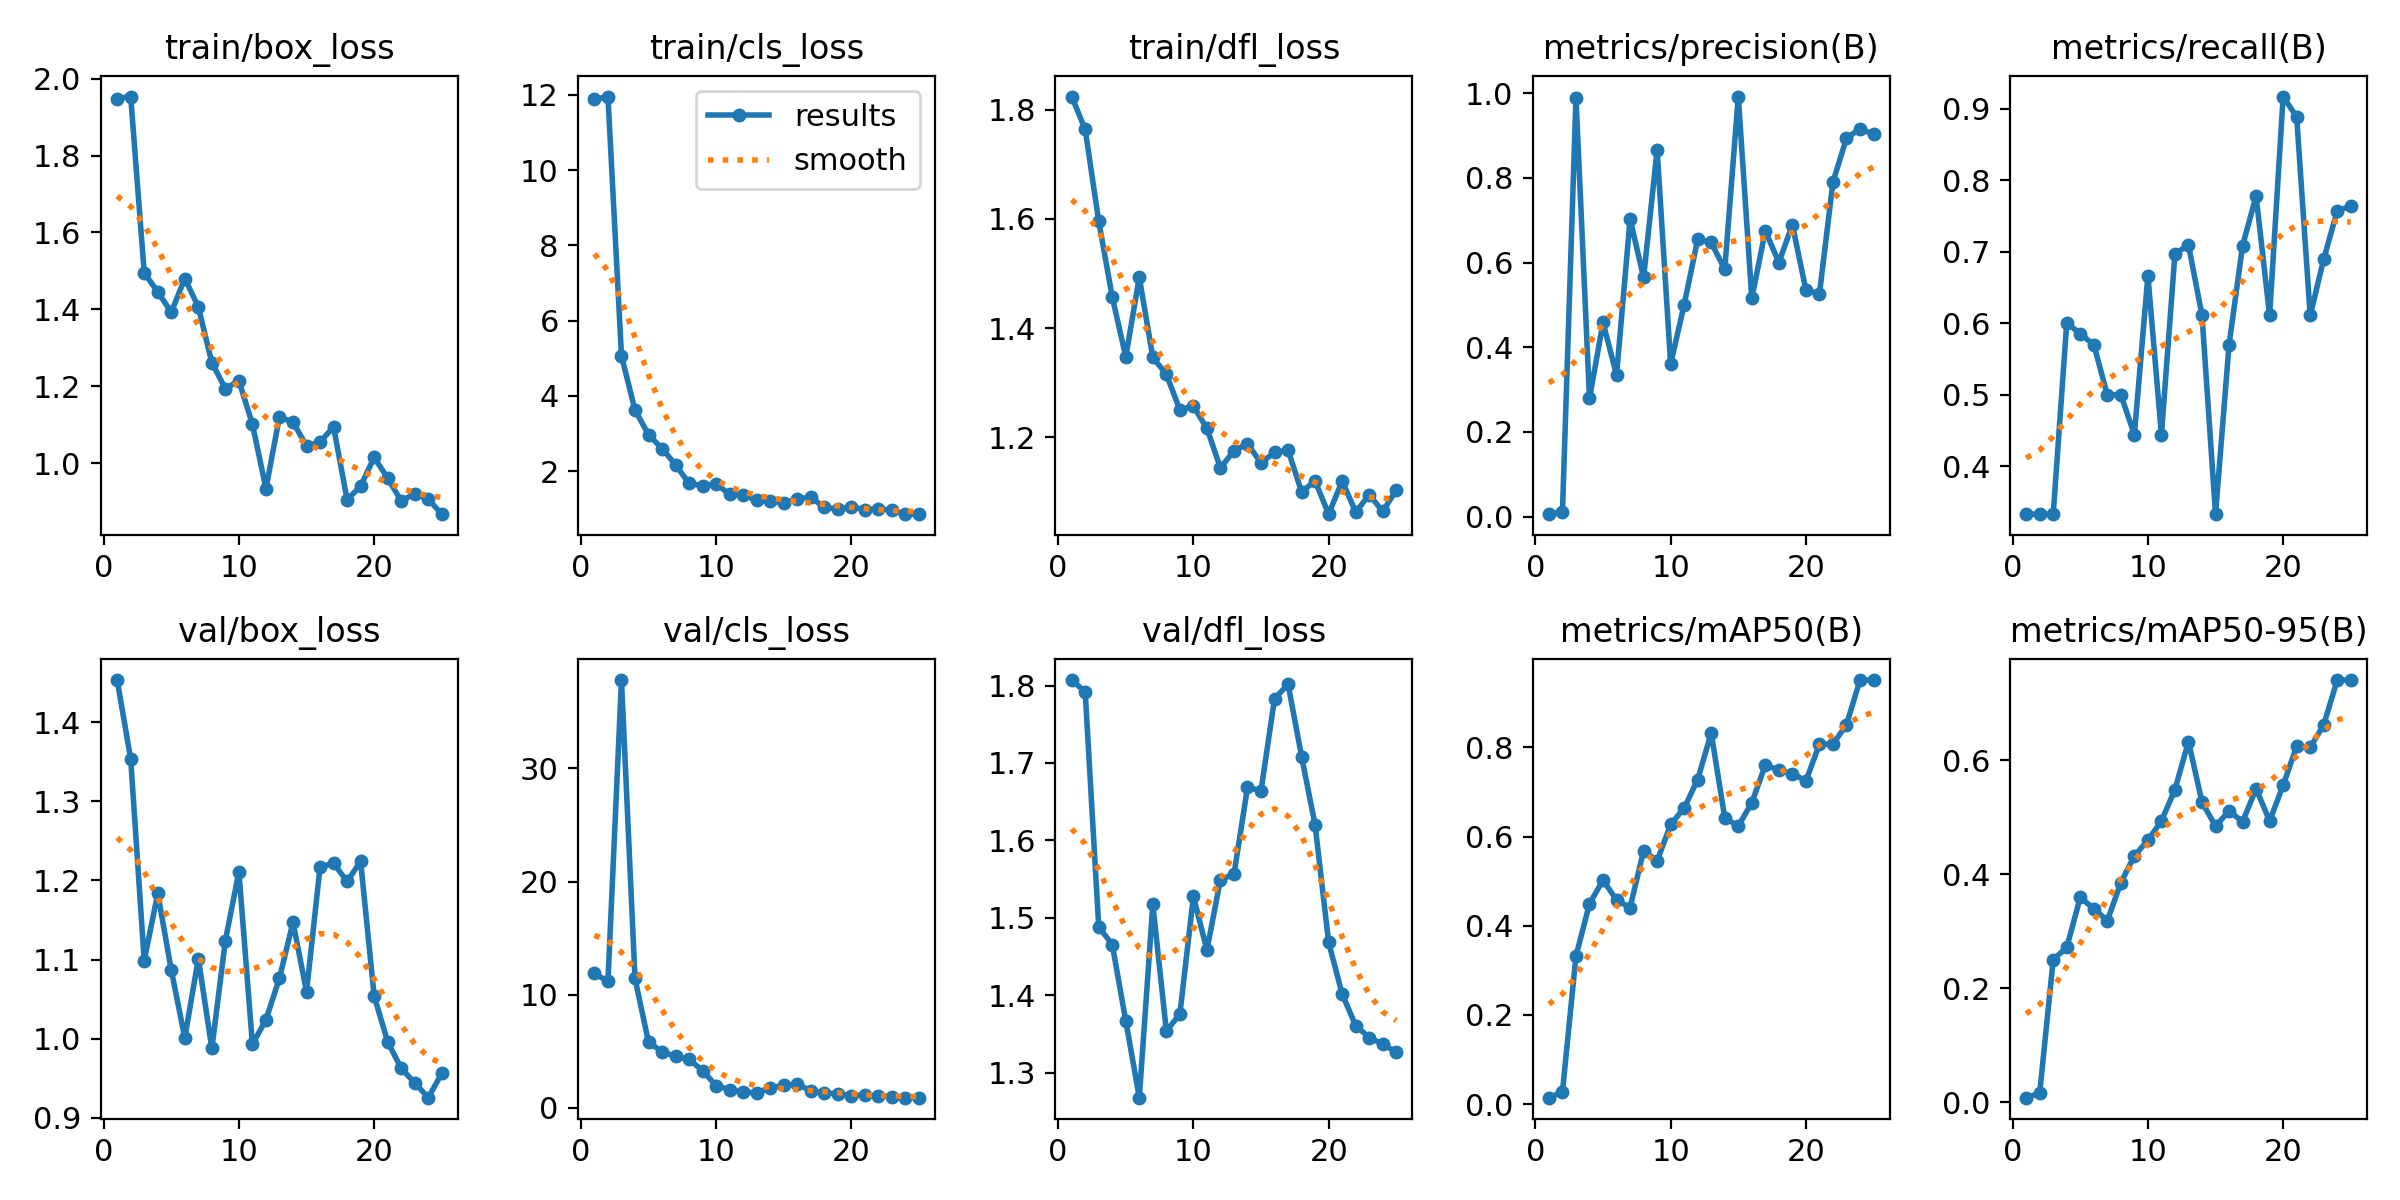

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


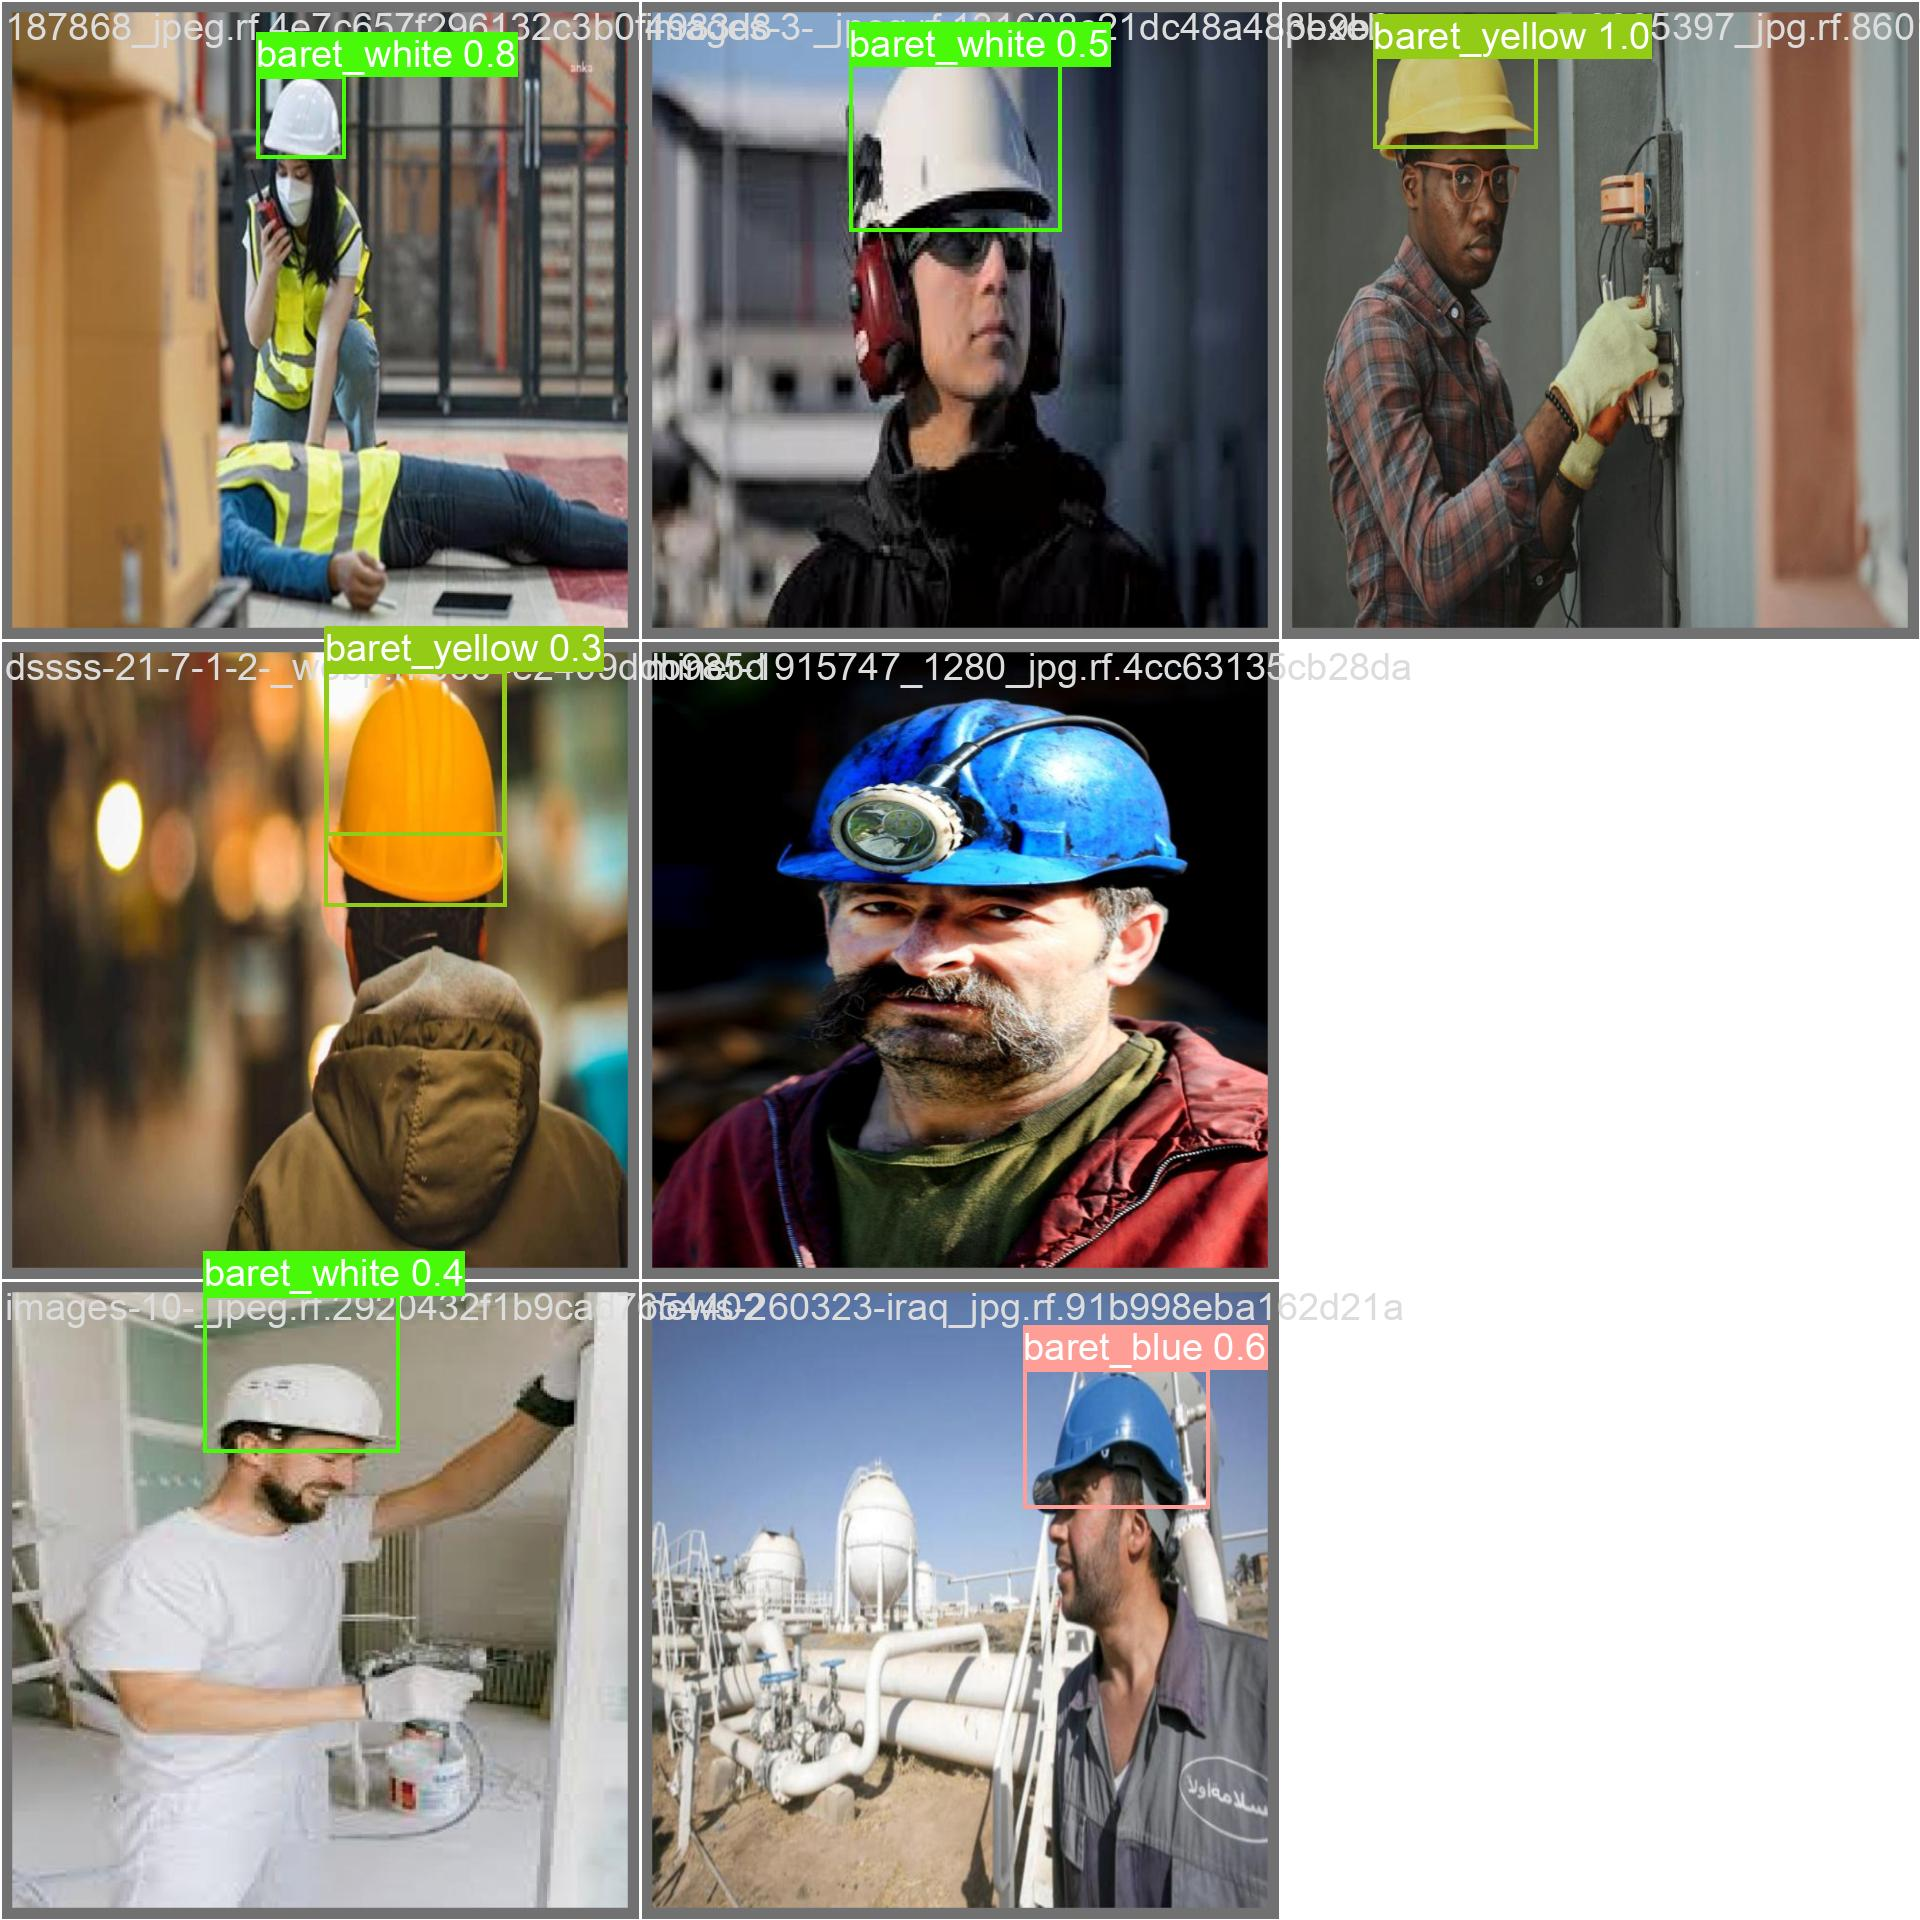

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/3 /content/datasets/baret_detection-1/test/images/depositphotos_406051588-stock-photo-selective-focus-builder-hardhat-tool_jpg.rf.543a16565776af35719f632afa7918c6.jpg: 800x800 1 baret_blue, 1 baret_yellow, 22.5ms
image 2/3 /content/datasets/baret_detection-1/test/images/images-2-_jpeg.rf.dfc0f66b4275da6f57a6634abc7f49bc.jpg: 800x800 (no detections), 22.5ms
image 3/3 /content/datasets/baret_detection-1/test/images/images_jpeg.rf.3b99f0e2a7eb20c7e0659a3efedec057.jpg: 800x800 (no detections), 22.5ms
Speed: 5.4ms preprocess, 22.5ms inference, 208.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
print(result)

{'inference_id': 'a59e0b47-fc55-4663-a9b7-450743c0bd7e', 'time': 0.03876654599980611, 'image': {'width': 378, 'height': 252}, 'predictions': [{'x': 186.5, 'y': 71.0, 'width': 169.0, 'height': 94.0, 'confidence': 0.9039835333824158, 'class': 'baret_white', 'class_id': 5, 'detection_id': '926e5c64-466f-4297-af0f-9b6e1d293dd5'}]}


{'inference_id': '7463c169-9b6c-4b44-8f72-e69b74c4c996', 'time': 0.03574140799992165, 'image': {'width': 378, 'height': 252}, 'predictions': [{'x': 186.5, 'y': 71.0, 'width': 169.0, 'height': 94.0, 'confidence': 0.9039835333824158, 'class': 'baret_white', 'class_id': 5, 'detection_id': '7c3d748f-e4e8-4821-bf1d-f2815061e50a'}]}


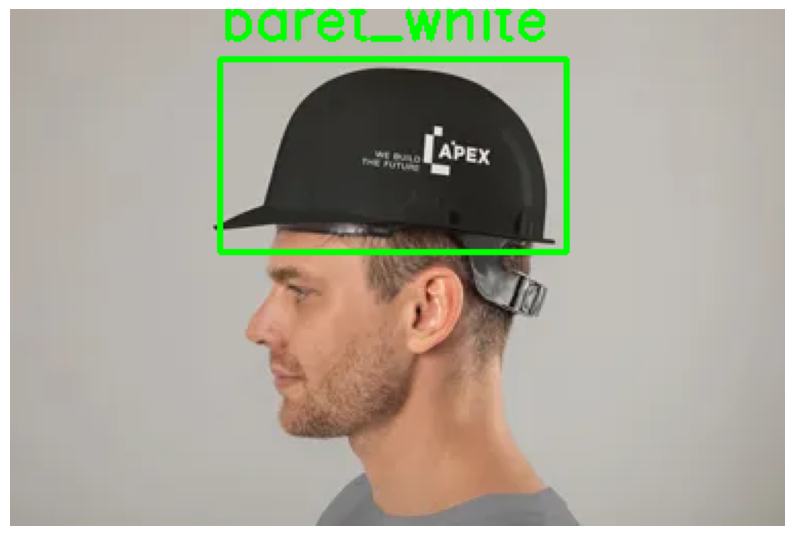

In [ ]:
from inference_sdk import InferenceHTTPClient
import cv2
import matplotlib.pyplot as plt

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="Your api url",
    api_key="Your API key"
)

# Infer on a local image
result = CLIENT.infer("b.jpg", model_id="baret_detection/1")

# Print the predictions
print(result)

# Load the image
image = cv2.imread("b.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw the predictions on the image
for prediction in result['predictions']:
    x1, y1 = int(prediction['x'] - prediction['width'] / 2), int(prediction['y'] - prediction['height'] / 2)
    x2, y2 = int(prediction['x'] + prediction['width'] / 2), int(prediction['y'] + prediction['height'] / 2)
    label = prediction['class']

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put the label near the bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with the predictions using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

{'inference_id': 'dbf877ca-3a3d-4fc7-9c1c-0cd0b1d20669', 'time': 0.03943698100010806, 'image': {'width': 1000, 'height': 667}, 'predictions': [{'x': 526.5, 'y': 136.5, 'width': 433.0, 'height': 259.0, 'confidence': 0.9942666292190552, 'class': 'baret_yellow', 'class_id': 6, 'detection_id': '8afbbbd1-9cff-4abd-b68b-2c9ad3a08d58'}]}


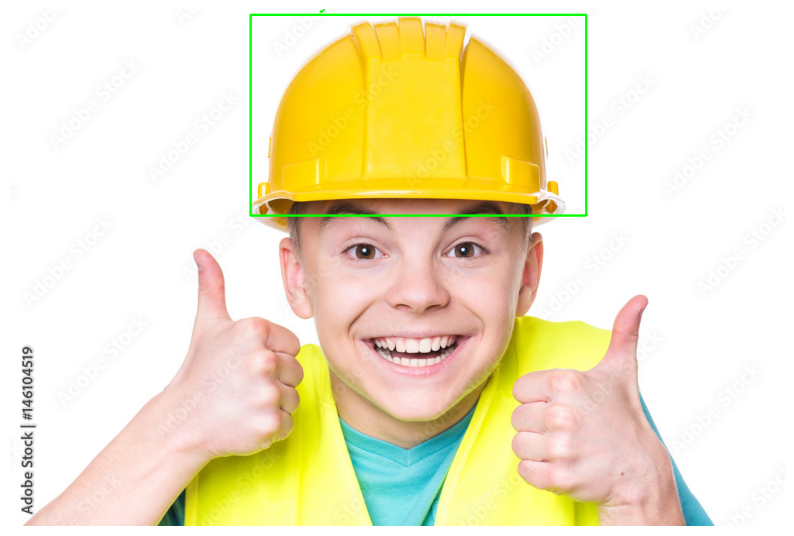

In [ ]:
from inference_sdk import InferenceHTTPClient
import cv2
import matplotlib.pyplot as plt

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="Your api_url ",
    api_key="Your API key"
)

# Infer on a local image
result = CLIENT.infer("ba.jpg", model_id="baret_detection/1")

# Print the predictions
print(result)

# Load the image
image = cv2.imread("ba.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw the predictions on the image
for prediction in result['predictions']:
    x1, y1 = int(prediction['x'] - prediction['width'] / 2), int(prediction['y'] - prediction['height'] / 2)
    x2, y2 = int(prediction['x'] + prediction['width'] / 2), int(prediction['y'] + prediction['height'] / 2)
    label = prediction['class']

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put the label near the bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with the predictions using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

{'inference_id': '3f60ad30-231a-4187-a3ff-7c997102237a', 'time': 0.0449967130002733, 'image': {'width': 1848, 'height': 1391}, 'predictions': [{'x': 693.0, 'y': 181.37109375, 'width': 411.46875, 'height': 247.2421875, 'confidence': 0.8801006078720093, 'class': 'baret_yellow', 'class_id': 6, 'detection_id': '8461363d-ca65-4997-9422-fa5c1fc16eac'}]}


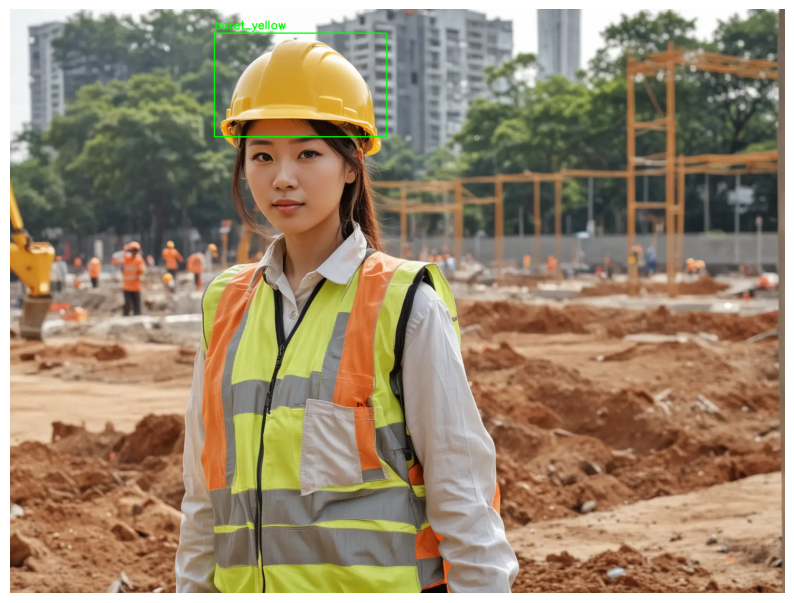

In [ ]:
from inference_sdk import InferenceHTTPClient
import cv2
import matplotlib.pyplot as plt

# Initialize the client
CLIENT = InferenceHTTPClient(
    api_url="Your API url",
    api_key="Your api key"
)

# Infer on a local image
result = CLIENT.infer("bar.jpg", model_id="baret_detection/1")

# Print the predictions
print(result)

# Load the image
image = cv2.imread("bar.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw the predictions on the image
for prediction in result['predictions']:
    x1, y1 = int(prediction['x'] - prediction['width'] / 2), int(prediction['y'] - prediction['height'] / 2)
    x2, y2 = int(prediction['x'] + prediction['width'] / 2), int(prediction['y'] + prediction['height'] / 2)
    label = prediction['class']

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put the label near the bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with the predictions using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()